<a href="https://colab.research.google.com/github/bahram3000/google_colab/blob/main/eth_period_and_predictions_find.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from my_func_pkg import find_best_period_for_dependency,blind_boundary_exp_smooth_curve,most_frequency_cenarios
import yfinance as yf
import numpy as np

In [2]:
eth=yf.download('ETH-USD',interval='1D')

[*********************100%***********************]  1 of 1 completed


In [3]:
fbpdun=find_best_period_for_dependency(eth.Close.values,overlay=False)

100%|██████████| 1295/1295 [02:50<00:00,  7.58it/s]


Enter your number of points :50
Enter your number of try fit :1000


100%|██████████| 1000/1000 [00:00<00:00, 1185.36it/s]


In [4]:
pd.DataFrame(fbpdun[0]).to_csv('ethfbpdun.csv')

In [5]:
from my_func_pkg import intersect,fix_num_key_index
import matplotlib.pyplot as plt

In [6]:
fnki=fix_num_key_index(fbpdun[0],point_num=50,max_iter=1000)

100%|██████████| 1000/1000 [00:00<00:00, 1112.94it/s]


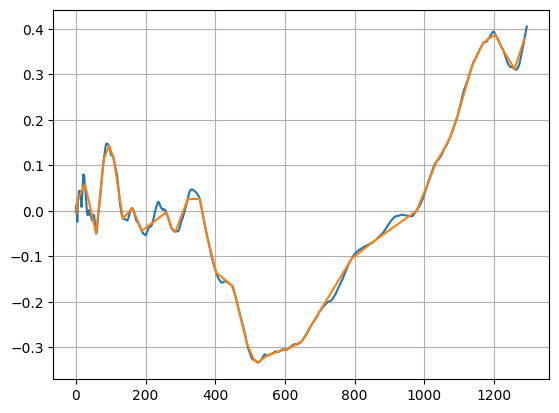

In [7]:
plt.plot(fbpdun[0])
plt.plot(fnki,fbpdun[0][fnki])
plt.grid()
plt.show()

In [8]:
fbpdov=find_best_period_for_dependency(eth.Close.values,overlay=True)

100%|██████████| 2593/2593 [05:41<00:00,  7.60it/s] 


In [9]:
pd.DataFrame(fbpdov[0]).to_csv('ethfbpdov.csv')

In [10]:
len(fbpdov[0])

2593

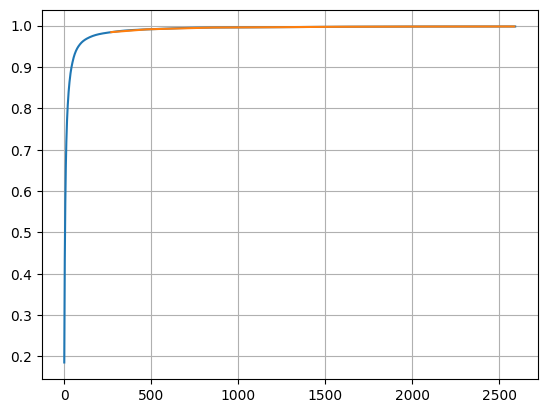

In [11]:
plt.plot(fbpdov[0])
plt.plot(fbpdov[1],fbpdov[0][fbpdov[1]])
plt.grid()
plt.show()

In [12]:
section=intersect(fbpdov[1],fnki)

In [13]:
section

array([1096, 1164])

In [14]:
fnki

array([   1,    6,   26,   58,   80,   95,  108,  135,  162,  167,  189,
        259,  275,  286,  321,  355,  379,  403,  447,  456,  489,  490,
        511,  522,  549,  551,  562,  586,  610,  648,  650,  676,  792,
        862,  977, 1009, 1034, 1057, 1074, 1092, 1096, 1137, 1164, 1170,
       1184, 1185, 1204, 1227, 1259, 1287])

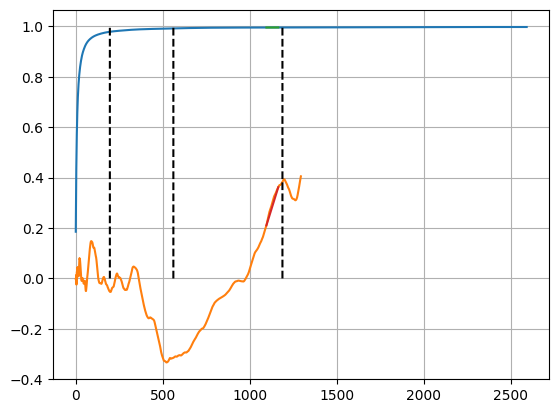

In [15]:
plt.plot(fbpdov[0])
plt.plot(fbpdun[0])
plt.plot(section,fbpdov[0][section])
plt.plot(section,fbpdun[0][section])
plt.plot([196]*(len(fbpdov[0])+len(fbpdun[0])),np.linspace(0,1,len(fbpdov[0])+len(fbpdun[0])),linestyle='--',c='black')
plt.plot([561]*(len(fbpdov[0])+len(fbpdun[0])),np.linspace(0,1,len(fbpdov[0])+len(fbpdun[0])),linestyle='--',c='black')
plt.plot([1188]*(len(fbpdov[0])+len(fbpdun[0])),np.linspace(0,1,len(fbpdov[0])+len(fbpdun[0])),linestyle='--',c='black')
plt.grid()
plt.show()

In [17]:
from my_func_pkg import find_pivot

In [18]:
pv=find_pivot(fbpdun[0])

In [19]:
pv[0]

array([  21,   90,  162,  237,  332,  936, 1198])

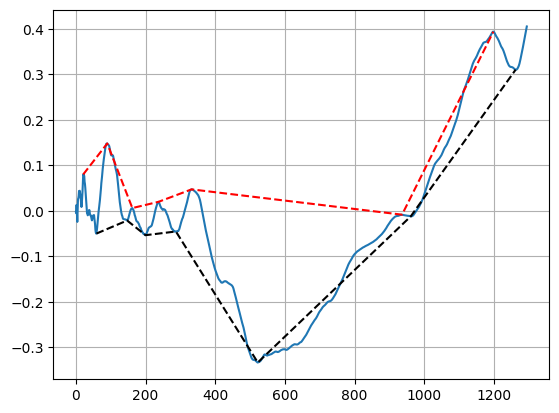

In [20]:
plt.plot(fbpdun[0])
plt.plot(pv[0],fbpdun[0][pv[0]],linestyle='--',c='red')
plt.plot(pv[1],fbpdun[0][pv[1]],linestyle='--',c='black')
plt.grid()
plt.show()

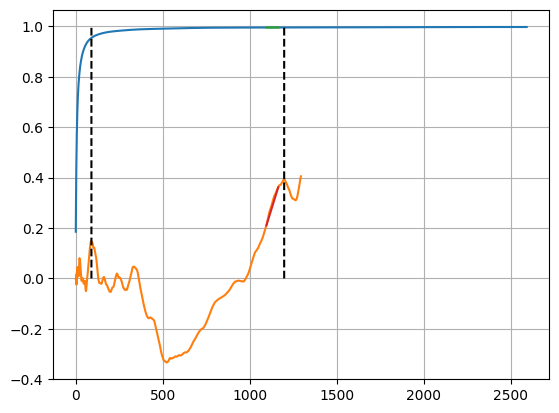

In [22]:
plt.plot(fbpdov[0])
plt.plot(fbpdun[0])
plt.plot(section,fbpdov[0][section])
plt.plot(section,fbpdun[0][section])
plt.plot([90]*(len(fbpdov[0])+len(fbpdun[0])),np.linspace(0,1,len(fbpdov[0])+len(fbpdun[0])),linestyle='--',c='black')
plt.plot([1198]*(len(fbpdov[0])+len(fbpdun[0])),np.linspace(0,1,len(fbpdov[0])+len(fbpdun[0])),linestyle='--',c='black')
plt.grid()
plt.show()